[Link 1 para cálculo](https://community.infineon.com/t5/Knowledge-Base-Articles/Calculate-IGBT-losses-for-a-SPWM-voltage-source-converter/ta-p/381757#.)

[Link 2 Passo a Passo](https://community.infineon.com/t5/Knowledge-Base-Articles/IGBT-FF1200R12IE5P-Loss-calculation-in-an-SPWM-voltage-source-converter-topology/ta-p/383277)




In [2]:
import math

In [ ]:
math.cos(30*2*math.pi/180)

0.5000000000000001

In [ ]:
math.pi

3.141592653589793

In [15]:
td = 2e-6  #Dead time
s_inversor = 500  #S_inversor(KVA)
v_dc = 700  #tensão do lado cc
v_ca = 415 #tensão do lado ca(RMS)(linha)
fp =0.8
fsw = 1350 #frequencia de chaveamento
Ts = 1/fsw

In [16]:
#Corrente de linha a plena carga(RMS)
ifl = (s_inversor*1000)/(v_ca*math.sqrt(3))
#Valor maximo do indice de modulação
m = (v_ca*math.sqrt(2))/v_dc
print(m)
print(ifl)

0.838426611978335
695.6027339634046


In [17]:
ICM = ifl*math.sqrt(2) #modulo da corrente

**Corrente média no IGBT**

$I_{c,avg} = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{CM}}{\pi} + m*fp*\frac{I_{CM}}{8}$



In [18]:
#Corrente media no igbt
ic_avg = (0.5 -(td/Ts))*(ICM/math.pi) +m*fp*(ICM/8)
ic_avg

238.19877825913477

**Corrente RMS no IGBT**

$I_{C,rms}^2 = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{CM}^2}{4} + m *fp* \frac{I_{CM}^2}{3\pi}$



In [20]:
#Corrente RMS no IGBT
ic_rms = (0.5 -(td/Ts))*(ICM*ICM/4)+m*fp*(ICM*ICM/(3*math.pi))
ic_rms
math.sqrt(ic_rms)

434.9523979762513

**Corrente média no diodo**

$I_{c,avg} = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{DM}}{\pi} - m*fp*\frac{I_{DM}}{8}$



In [21]:
#Corrente media no diodo
IDM = ICM #Definindo idm = icm
id_avg = ((0.5 +(td/Ts)))*(IDM/3.14) - m*fp*(IDM/8)
id_avg

75.01230840000069

**Corrente RMS no diodo**

$I_{C,rms}^2 = \left(\frac{1}{2} - \frac{t_d}{T_s}\right)\frac{I_{DM}^2}{4} - m *fp* \frac{I_{DM}^2}{3\pi}$


In [22]:
#Corrente RMS no diodo
id_rms = ((0.5 +(td/Ts)))*(IDM*IDM/4) - m*fp*(IDM*IDM/(3.14*3))
math.sqrt(id_rms)

229.59325091497223

**Gráficos para encontrar os valores de RT, VCE0, Eon, Eoff**
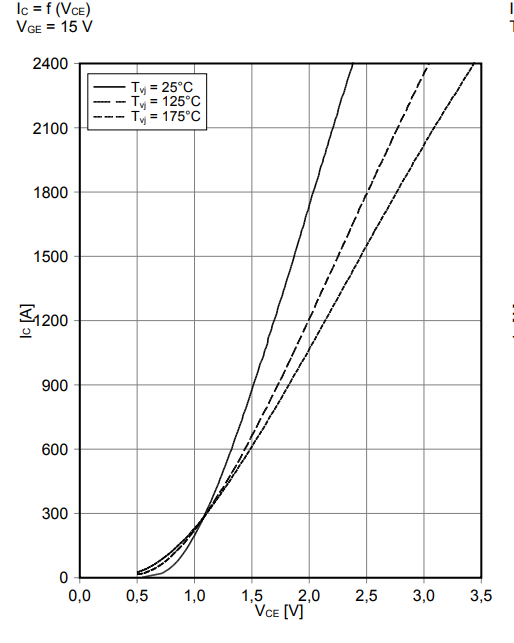

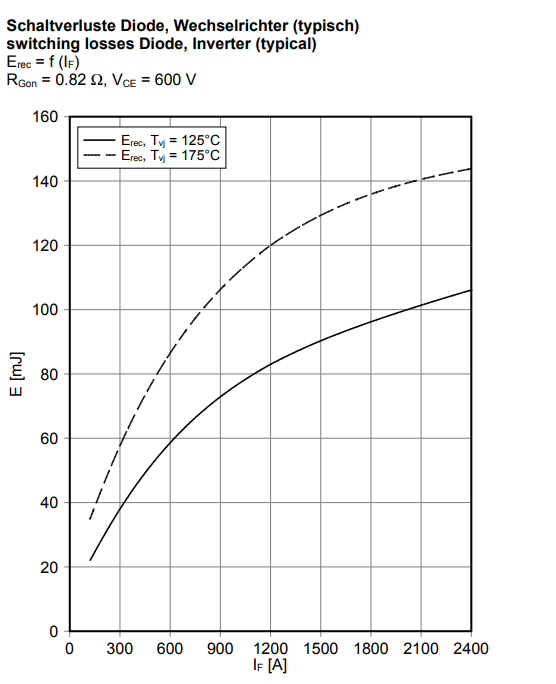
